## Esercitazione 6 - 26 Marzo 2024

Scrivere le funzioni python `bisezione.py`, `falsi.py`, `corde.py`, `secanti.py`,`newton.py` che implementino rispettivamente il metodo di bisezione, di falsa posizione, delle corde, delle secanti e di Newton.

Le funzioni `bisezione.py`, `falsi.py` devono assumere come input:

-  gli estremi dell'intervallo [a,b], dominio di f.
-  il nome `fname` della funzione di cui calcolare lo zero
-  tol: tolleranza per il test di arresto.
    Nel caso del metodo di bisezione e di falsa posizione si considera per il test di arresto l’ampiezza del sottointervallo confrontata con tolx.
-  nmax= numero massimo di iterazioni
    
In output:
-      lo zero della funzione
-      il numero di iterazioni effettuate
-      una lista contenente tutti gli iterati xk

La funzione `corde.py` deve assumere come input:

-  l'iterato iniziale x_0.
-  il coefficiente angolare comune a tutte le rette
-  il nome `fname` della funzione di cui calcolare lo zero
-  tolx: tolleranza per il test di arresto sull'incremento:          
               |x_k+1-x_k|/|x_k+1|<= tolx
-  tolf: tolleranza per il test di arresto sulla funzione
        
                |abs(f(x_k+1)|<= tolf
-  nmax= numero massimo di iterazioni
    
In output:
-      lo zero della funzione
-      il numero di iterazioni effettuate
-      una lista contenente tutti gli iterati xk
La funzione `newton.py` deve assumere come input:

-  l'iterato iniziale x_0.
-  il nome `fname` della funzione di cui calcolare lo zero
-  il nome `fpname` della derivata prima della funzione di cui calcolare lo zero
-  tolx: tolleranza per il test di arresto sull'incremento:          
               |x_k+1-x_k|/|x_k+1|<= tols
-  tolf: tolleranza per il test di arresto sulla funzione
        
                |abs(f(x_k+1)|<= tolf
-  nmax= numero massimo di iterazioni
    
In output:
-      lo zero della funzione
-      il numero di iterazioni effettuate
-      una lista contenente tutti gli iterati xk

La funzione `secanti.py` deve assumere come input:

-  due iterati iniziali x_1, x_0.
-  il nome `fname` della funzione di cui calcolare lo zero
-  tolx: tolleranza per il test di arresto sull'incremento:         
               |x_k+1-x_k|/|x_k+1|<= tolx
-  tolf: tolleranza per il test di arresto sulla funzione
        
                |abs(f(x_k+1)|<= tolf
-  nmax= numero massimo di iterazioni
    
In output:
-      lo zero della funzione
-      il numero di iterazioni effettuate
-      una lista contenente tutti gli iterati xk

**Sperimentazione numerica**

 Confrontare i metodi sopra implementati nei casi seguenti:

- f(x) = exp(−x) − (x + 1) in [−1, 2] con x0 = −0.5, x−1 = −0.3, tolx = 1.e − 12, tolf = 1.e − 12, (soluzione esatta alfa=0);
- f(x) = log2(x + 3) − 2 in [−1, 2] con x0 = −0.5, x−1 = 0.5, tolx = 1.e − 12, tolf = 1.e − 12, (soluzione esatta alfa=1);
- f(x) =sqrt(x)-(x^2)/4 in [1, 3] con x0 = 1.8, x−1 = 1.5, tolx = 1.e − 12, tolf =1.e − 12, (soluzione esatta alfa=2**(4/3))

Mostrare in un grafico in scala semilogaritmica sulle ordinate (comando semilogy) l’andamento di ek = |xk − α|, k = 1, ..., nit, sapendo che α = 0, 1, 2**(4/3) nei
tre casi.
Calcolare infine, a partire dai valori di {xk} con k sufficientemente grande, la stima dell’ordine di convergenza p come

p= ln (|x_{k+1}-x_k|/|x_k-x_{k-1}|)/ln (|x_k-x_{k-1}|/|x_{k-1}-x_{k-2}|)

In [189]:
import math
def sign(x):
  """
  Funzione segno che restituisce 1 se x è positivo, 0 se x è zero e -1 se x è negativo.
  """
  return math.copysign(1, x)

In [190]:
def falsi(a,b,f,tol,maxIterations):
    fa=f(a)
    fb=f(b)
    if sign(fa)*sign(fb) >= 0:
         # throw error
        print("f(a) e f(b) hanno lo stesso segno",fa,fb)    
    it = 0
    x_k=[]
    c=0.0
    fxk=10
    while abs(b-a) > tol and it < maxIterations and abs(fxk) > tol:
        c = a-f(a)*(b-a)/(f(b)-f(a))
        x_k.append(c)
        fxk=f(c)
        it+=1
        if f(c) == 0:
            return [c, it, x_k]
        if f(a)*f(c) < 0:
            b = c
        else:
            a = c
    return [c, it, x_k]

In [191]:
def corde(f,m,x0,tolx,tolf,maxIt):
    it=1
    x_k=[]
    x_k.append(x0)
    if f(x0)==0:
        return [x0, it, x_k]
    while it<maxIt and abs(f(x0))>tolf and abs(m-f(x0)/m)>tolx:
        x1=x0-f(x0)/m
        x_k.append(x1)
        it+=1
        if f(x1)==0:
            return [x1, it, x_k]
        x0=x1
    return [x0, it, x_k]

In [192]:
def newton(f,fp,x0,tolf,tolx,maxIt):
    '''
    INPUT:
    f: lambda, funzione
    fp: lambda, derivata della funzione
    x0: float, punto iniziale
    tolx: float, tolleranza richiesta
    tolf: float, tolleranza della funzione richiesta
    maxIt: int, numero massimo di iterazioni

    OUTPUT:
    [0] => 0 della funzione
    [1] => numero di iterazioni
    [2] => valore di x 
    '''
    it=1
    x_k=[]
    x_k.append(x0)
    if f(x0)==0:
        return [x0, it, x_k]
    while it<maxIt and abs(f(x0))>tolf and abs(fp(x0))>tolx:
        x1=x0-f(x0)/fp(x0)
        x_k.append(x1)
        it+=1
        if f(x1)==0:
            return [x1, it, x_k]
        x0=x1
    return [x0, it, x_k]

In [193]:
def secanti(xm1,x0,f,tolx,tolf,maxIt):
    xk=[]
    fxm1=f(xm1)
    fx0=f(x0) 
    d=fx0*(x0-xm1)/(fx0-fxm1)
    x1=x0-d
    xk.append(x1)
    fx1=f(x1)
    it=1
    while it<maxIt and abs(fx1)>=tolf and abs(d)>=tolx*abs(x1):
        xm1=x0
        x0=x1
        fxm1=f(xm1)
        fx0=f(x0) 
        d=fx0*(x0-xm1)/(fx0-fxm1)
        x1=x0-d
        fx1=f(x1)
        xk.append(x1)
        it=it+1
       
    if it==maxIt:
       print('Secanti: raggiunto massimo numero di iterazioni \n')
    
    return [x1,it,xk]

In [194]:
import bisezione
import numpy as np
import math
import matplotlib.pyplot as plt

scelta = int(input("Scegli la funzione: 1) f(x)=e^(-x)-(x+1)\n 2) f(x)=log2(x+3)-2 \n 3) f(x)=sqrt(x)-(x^2)/4"))

bis, fal, cor, new, sec = True, True, True, True, True

if scelta == 1:
    def f1(x):
        return math.exp(-x) - (x+1)
    def fp1(x):
        return -math.exp(-x) - 1

    a=-1
    b=2
    f=f1
    fp=fp1
    alfa = 0
    x0=-0.5
    x1=-0.3
elif scelta == 2:
    def f2(x):
        return math.log2(x+3)-2
    def fp2(x):
        return 1/(math.log(2)*(x+3))
    a=-1
    b=2
    f=f2
    fp=fp2
    alfa = 1
    x0=-0.5
    x1=0.5
else:
    def f3(x):
        return math.sqrt(x)-(x**2)/4
    def fp3(x):
        return 1/(2*math.sqrt(x))-x/2
    a=1
    b=3
    f=f3
    fp=fp3
    alfa = 2**(4/3)
    x0=1.8
    x1=1.5

#bisezione
try: 
    res= bisezione.bisezione( a,b, f , 1.e-12, 100)
    zero = res[0]
    iterationB = res[1]
    v_b = res[2]
    print("Zero: ", zero)  
    if zero == None:
        bis = False
except ValueError:
    print("No zero found")
    exit(1)
#------------------------------------------------ 

#falsi
res = falsi(a=a,b= b ,f=f,tol= 1.e-12,maxIterations= 100)
zero = res[0]
iterationF = res[1]
v_f = res[2]
print("Zero: ", zero)
if zero == None:
    falsi = False
#------------------------------------------------

#corde
m=(f(b)-f(a))/(b-a)
res = corde(f,m,x0,1.e-12,1.e-12,100)
zero = res[0]
iterationC = res[1]
v_c = res[2]
print("Zero: ", zero)
if zero == None:
    cor = False
#------------------------------------------------

#newton
res = newton(f,fp,x0,1.e-12,1.e-12,100)
zero = res[0]
iterationN = res[1]
v_n = res[2]
print("Zero: ", zero)
if zero == None:
    new = False
#------------------------------------------------

#secanti
res = secanti(x0,x1,f,1.e-12,1.e-12,100)
zero = res[0]
iterationS = res[1]
v_s = res[2]
print("Zero: ", zero)
if zero == None:
    sec = False
#------------------------------------------------


#print function
xx=np.linspace(a,b,100)
val=np.array([f(x) for x in xx])
plt.plot(xx,val)
plt.ylabel("f(x)")
plt.xlabel("x")
plt.title("function")
plt.show()


#print method's iterations
v_f=np.array(v_f)
ek_f=np.abs(v_f-alfa)
v_b=np.array(v_b)
ek_b=np.abs(v_b-alfa)
v_c=np.array(v_c)
ek_c=np.abs(v_c-alfa)
v_n=np.array(v_n)
ek_n=np.abs(v_n-alfa)
v_s=np.array(v_s)
ek_s=np.abs(v_s-alfa)
labels = []
if bis: 
    plt.semilogy(range(iterationB),ek_b,'-o') 
    labels.append("bisezione")
if fal:
    plt.semilogy(range(iterationF),ek_f,'-s')
    labels.append("falsi")
if cor:
    plt.semilogy(range(iterationC),ek_c,'-x')
    labels.append("corde")
if new:
    plt.semilogy(range(iterationN),ek_n,'-*')
    labels.append("newton")
if sec:
    plt.semilogy(range(iterationS),ek_s,'-*')
    labels.append("secanti")
plt.xlabel("iterazioni")
plt.ylabel("valori calcolati")
plt.legend(labels)
plt.show()


ValueError: invalid literal for int() with base 10: ''

- Utilizzare il metodo di Newton e il metodo di Newton modificato per il calcolo
dello zero di molteplicita' 2 della funzione f(x) = 
x^3 + x^2− 33x + 63 con x0 = 1,
tolx = 1.e − 12 e tolf = 1.e − 12. Calcolare infine, a partire dai valori di {xk}
ottenuti nei due casi, la stima dell’ordine di convergenza p.

In [ ]:
import numpy as np
def stima_ordine(xk,iterazioni):
     #Vedi dispensa allegata per la spiegazione

      k=iterazioni-4
      p=np.log(abs(xk[k+2]-xk[k+3])/abs(xk[k+1]-xk[k+2]))/np.log(abs(xk[k+1]-xk[k+2])/abs(xk[k]-xk[k+1]));
     
      ordine=p
      return ordine

In [ ]:
def newtonModificato(f,fp,m,x0,tolf,tolx,maxIt):
    '''
    INPUT:
    f: lambda, funzione
    fp: lambda, derivata della funzione
    m: float, molteplicità dello zero
    x0: float, punto iniziale
    tolx: float, tolleranza richiesta
    tolf: float, tolleranza della funzione richiesta
    maxIt: int, numero massimo di iterazioni

    OUTPUT:
    [0] => 0 della funzione
    [1] => numero di iterazioni
    [2] => valore di x 
    '''
    it=1
    x_k=[]
    x_k.append(x0)
    if f(x0)==0:
        return [x0, it, x_k]
    while it<maxIt and abs(f(x0))>tolf and abs(fp(x0))>tolx:
        x1=x0-m*f(x0)/fp(x0)
        x_k.append(x1)
        it+=1
        if f(x1)==0:
            return [x1, it, x_k]
        x0=x1
    return [x0, it, x_k]

Zero:  2.999999813817361
Zero:  2.9999999996871622


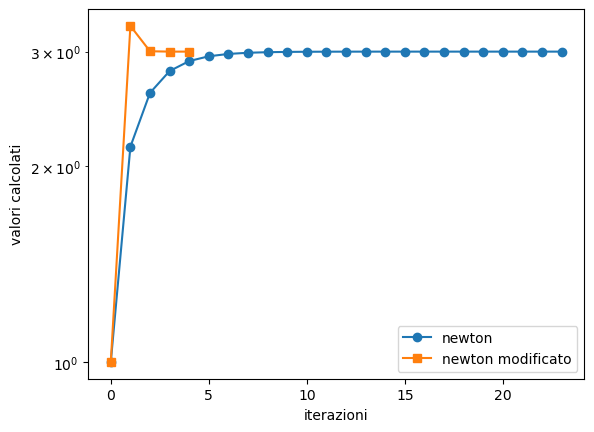

Ordine di convergenza Newton:  1.0008987815015167
Ordine di convergenza Newton Modificato:  1.9965427710643453


In [ ]:
f=lambda x: x**3+x**2-33*x+63
fp=lambda x: 3*x**2+2*x-33
m=2
x0=1
tolf=1.e-12
tolx=1.e-12
maxIt=100
res=newton(f,fp,x0,tolf,tolx,maxIt)
zero=res[0]
iteration=res[1]
v=res[2]
print("Zero: ", zero)

res=newtonModificato(f,fp,m,x0,tolf,tolx,maxIt)
zero=res[0]
iterationMod=res[1]
vMod=res[2]
print("Zero: ", zero)

plt.semilogy(range(iteration),np.array(v),'-o',label='newton')
plt.semilogy(range(iterationMod),np.array(vMod),'-s',label='newton modificato')
plt.xlabel("iterazioni")
plt.ylabel("valori calcolati")
plt.legend()
plt.show()

print("Ordine di convergenza Newton: ",stima_ordine(v,iteration))
print("Ordine di convergenza Newton Modificato: ",stima_ordine(vMod,iterationMod))

- Utilizzare il metodo di bisezione ed il metodo di Newton per calcolare la radice quadrata di 2. Analizzate i risultati.

Zero:  1.4142135623730951
tolleranza superata
Zero:  1.4142135623735896


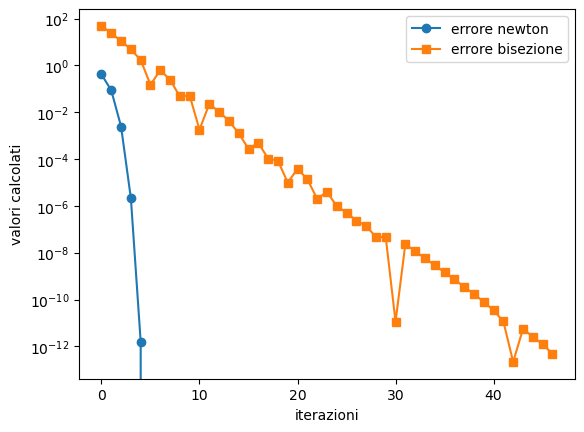

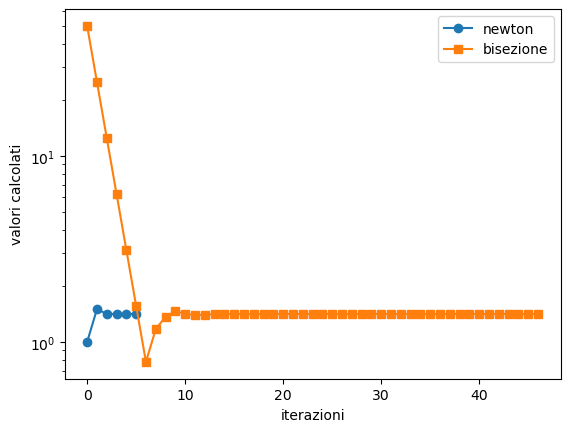

In [ ]:
f=lambda x: x**2 - 2 
fp=lambda x: 2*x

a=0
b=100
tolx=1.e-12
tolf=1.e-12
maxIt=100
x0=1
alfa=math.sqrt(2)

res=newton(f,fp,x0,tolf,tolx,maxIt)
zero=res[0]
iteration=res[1]
v=res[2]
print("Zero: ", zero)

res = bisezione.bisezione( a,b, f , 1.e-12, 100)
zero = res[0]
iterationB = res[1]
v_b = res[2]
print("Zero: ", zero)

v=np.array(v)
v_b=np.array(v_b)

# come calcolare l'errore relativo di questi metodi :
errore_Relativo_Newton = np.abs(v-alfa)
errore_Relativo_Bisezione = np.abs(v_b-alfa)

plt.semilogy(range(iteration),errore_Relativo_Newton,'-o',label='errore newton')
plt.semilogy(range(iterationB),errore_Relativo_Bisezione,'-s',label='errore bisezione')
plt.xlabel("iterazioni")
plt.ylabel("valori calcolati")
plt.legend()
plt.show()

plt.semilogy(range(iteration),v,'-o',label='newton')
plt.semilogy(range(iterationB),v_b,'-s',label='bisezione')
plt.xlabel("iterazioni")
plt.ylabel("valori calcolati")
plt.legend()
plt.show()

- Utilizzare il metodo di Newton per determinare le radici dell’equazione f (x) = 
rcatan(x) con x0 = 1.2, 1.4 assumendo tolx = 1.e − 6 e tolf = 1.e − 5. Che cos a
si osserva?

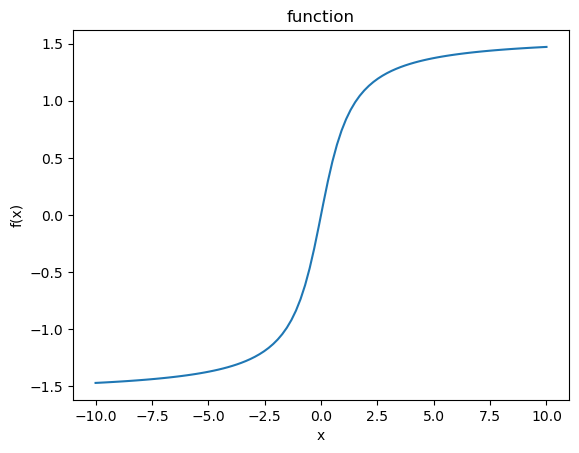

Zero:  -7.599003837201884e-12
Zero:  16540.5638272386


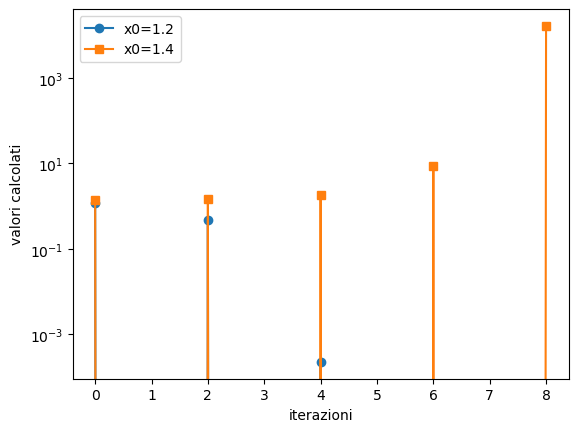

In [ ]:
f  = lambda x : np.arctan(x)
fp = lambda x : 1/(1+x**2)

x0 = 1.2
tolx = 1.e-6
tolf = 1.e-5

xx=np.linspace(-10,10,100)
val=np.array([f(x) for x in xx])
plt.plot(xx,val)
plt.ylabel("f(x)")
plt.xlabel("x")
plt.title("function")
plt.show()

res = newton(f,fp,x0,tolf,tolx,100)
zero = res[0]
iteration1 = res[1]
v1 = np.array(res[2])
print("Zero: ", zero)

x0=1.4
res = newton(f,fp,x0,tolf,tolx,100)
zero = res[0]
iteration2 = res[1]
print("Zero: ", zero)
v2 = np.array(res[2])

plt.semilogy(range(iteration1),v1,'-o',label='x0=1.2')
plt.semilogy(range(iteration2),v2,'-s',label='x0=1.4')
plt.xlabel("iterazioni")
plt.ylabel("valori calcolati")
plt.legend()
plt.show()

**Soluzione di sistemi non lineari**


- Scrivere la function `NewtonRaphson.py`, che implementa il metodo di Newton-Raphson
per il calcolo della soluzione di un sistema di equazioni non lineari. 

    Tale function
deve assumere come dati in input:
- fname: nome della funzione vettoriale di cui calcolare lo zero;
- JacName: nome della funzione che calcola lo J acobiano della funzione vettoriale;
- X0: vettore contenente le componenti dell'iterato iniziale);
- tolx tolleranza  per il test d'arresto sull'incremento
        ||X_{k+1}-X_k||/||X_{k}||<= tolx
- tolf tolleranza per il test del residuo
        ||F(Xk+1)|| <= tolf;
- NMAX numero massimo di iterazioni.
In output devono essere restituiti il vettore contenente l'approssimazione dello zero x, un vettore contenente l'errore relativo tra due iterati successivi, il numero di iterazioni
effettuate, nit.


**Sperimentazione Numerica**

Risolvere i seguenti tre sistemi non lineari:

1) 

   2x0-cos(x1)=0

   sin(x0)+2x1=0

2) 

   x0^2+x1^2-9=0

   x0+x1-3=0

3) 

   4x0^2+x_1^2=4

   x0+x1=sin(x0-x1)



Servirsi del metodo grafico per individuare un 
iterato iniziale  $X_0$  nell'intorno della soluzione che si vuole approssimare. Visualizzare le 
curve di livello corrisponenti a z=0 delle due superfici z1 = f1 (x0 ,x1 ) e z2 = f2(x0, x1 ) e 
definire come iterato iniziale un vettore $X_0$ oppurtuno le cui componenti stanno in un 
intorno della soluzione (punti di intersezione tra le curve di livello delle due superfici) 
 

In [195]:
def Newton_Raphson(f,j,X0,tolx,tolf,maxIt):
    '''
    metodo di Newton-Raphson per il calcolo della soluzione di un sistema di equazioni non lineari. 
    input:
    - f: nome della funzione vettoriale di cui calcolare lo zero;
    - j: nome della funzione che calcola lo J acobiano della funzione vettoriale;
    - X0: vettore contenente le componenti dell'iterato iniziale);
    - tolx tolleranza  per il test d'arresto sull'incremento
            ||X_{k+1}-X_k||/||X_{k}||<= tolx
    - tolf tolleranza per il test del residuo
            ||F(Xk+1)|| <= tolf;
    - maxIt numero massimo di iterazioni.
    In output devono essere restituiti il vettore contenente l'approssimazione dello zero x, un vettore contenente l'errore relativo tra due iterati successivi, il numero di iterazioni
    effettuate.
    '''
    it=1
    X_k=[]
    X_k.append(X0)
    F_k=f(X0)
    J_k=j(X0)
    if np.linalg.det(J_k) == 0:
        print("La matrice dello Jacobiano calcolata nell'iterato precedente non è a rango massimo")
        return None, None,None
    X1=X0-np.linalg.solve(J_k,F_k)
    X_k.append(X1)
    while it<maxIt and np.linalg.norm(X1-X0)/np.linalg.norm(X0)>tolx and np.linalg.norm(F_k)>tolf:
        X0=X1
        F_k=f(X0)
        J_k=j(X0)
        X1=X0-np.linalg.solve(J_k,F_k)
        X_k.append(X1)
        it+=1
    return [X1, it, X_k]

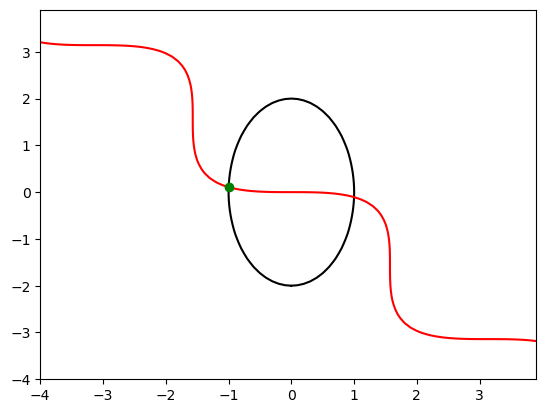

In [203]:
import numpy.linalg as npl
from mpl_toolkits.mplot3d import Axes3D

x = np.arange(-4, 4, 0.1)
y = np.arange(-4, 4, 0.1)
X, Y = np.meshgrid(x, y)

scelta_sistema=int(input("Scelta sistema"))

if scelta_sistema==1:
        F= lambda x : np.array([
            x[0]**2 + x[1]**2-9,
            x[0]+x[1]-3,
        ])
    
        Jac= lambda x: np.array([[2*x[0], 2*x[1]],[1,1]])

        Z=X**2+Y**2-9
        Z1=X+Y-3

elif scelta_sistema==2:
        
        F= lambda x : np.array([
            2*x[0] -np.cos(x[1]),
            np.sin(x[0])+2*x[1]])
        Jac= lambda x: np.array([[2, np.sin(x[1])],[np.cos(x[0]),2]])
        Z=2*X -np.cos(Y)
        Z1=np.sin(X)+2*Y
elif scelta_sistema==3:

        F= lambda x : np.array([
                    4*x[0]**2+x[1]**2-4,
                    x[0]+x[1]-np.sin(x[0]-x[1])
                   ])
        Jac= lambda x: np.array([[8*x[0], 2*x[1]],[1-np.cos(x[0]-x[1]),1+np.cos(x[0]-x[1])]])
        Z=4*X**2+Y**2-4
        Z1=X+Y-np.sin(X-Y)

x0=np.array([-1,1])
nmax=500
xN,contN,XmN= Newton_Raphson(F,Jac,x0,1e-10,1e-10,nmax)
plt.contour(X, Y, Z, levels=[0], colors='black')
plt.contour(X, Y, Z1, levels=[0], colors='red')
plt.plot(xN[0],xN[1],'go')
plt.show()